In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f_birth = pd.read_csv("daily-total-female-births-in-cal.csv", index_col = [0], parse_dates = [0], nrows = 365)

In [3]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<bound method DataFrame.info of             Daily total female births in California, 1959
Date                                                     
1959-01-01                                             35
1959-01-02                                             32
1959-01-03                                             30
1959-01-04                                             31
1959-01-05                                             44
...                                                   ...
1959-12-27                                             37
1959-12-28                                             52
1959-12-29                                             48
1959-12-30                                             55
1959-12-31                                             50

[365 rows x 1 columns]>

In [9]:
f_birth = f_birth[0:365]

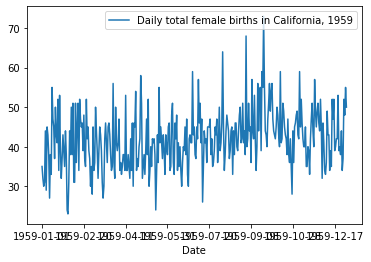

In [10]:
f_birth.plot()


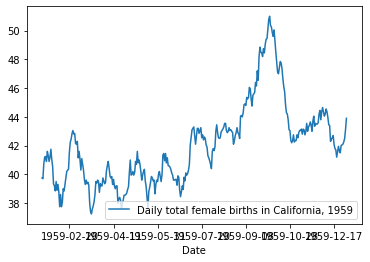

In [11]:
f_birth_mean = f_birth.rolling(window = 20).mean()
f_birth_mean.plot()

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

ARIMA - AutoRegressive (p) Integrated Moving (d) Average (q)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

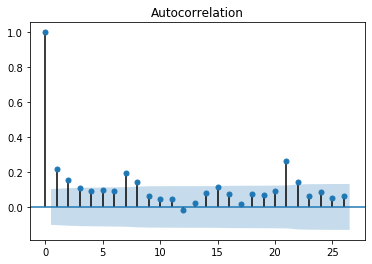

In [15]:
plot_acf(f_birth);

(q - Value) You can observe the first one is highly corelated until 3 
You can oberve the co-relation dropping off until it reaches critical limit at three where it becomes quite independent 

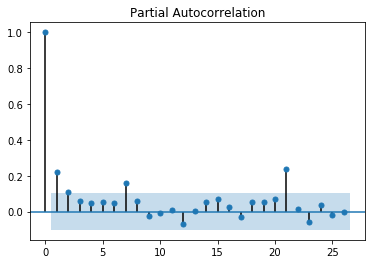

In [16]:
plot_pacf(f_birth);

(p - Value) start with p (2)

In [ ]:
# p = 2,3
# d = 0,1
# q = 3,4

In [19]:
f_birth.size

365

In [20]:
birth_train = f_birth[0:335]
birth_test = f_birth[335:]

In [21]:
birth_train.size , birth_test.size 

(335, 30)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
birth_model = ARIMA(birth_train, order = (2,1,3))

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [26]:
birth_model_fit = birth_model.fit()

In [143]:
birth_model_fit.aic # lesser the value more better the model

-351.75769091703694

In [34]:
birth_forecast = birth_model_fit.forecast(steps = 30)[0]

In [35]:
birth_forecast

array([45.09434614, 43.8795375 , 47.0258159 , 46.05440342, 43.81200021,
       46.33113341, 46.76197648, 44.14307842, 45.59942324, 47.11910994,
       44.75101345, 45.00714118, 47.11883698, 45.47416948, 44.67244582,
       46.83205176, 46.15214849, 44.63919734, 46.37977361, 46.66003152,
       44.87948095, 45.89910608, 46.92949884, 45.31113625, 45.51121346,
       46.95440282, 45.82411666, 45.29786643, 46.78209584, 46.30860016])

In [36]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34
1959-12-06,33
1959-12-07,36
1959-12-08,49
1959-12-09,43
1959-12-10,43


In [37]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

7.425213303672277

## Project 2 

In [38]:
# taking a look at some transformation

In [40]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
# Normalization 

# 1. Data on different scales
# 2. Algo work great with normalized data 

In [41]:
# normalization = (x - min)/ (max - min)

In [42]:
23 * 1.28

29.44

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
birth_arr = f_birth.values

In [45]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [46]:
scaler = MinMaxScaler(feature_range = (0,1))

In [47]:
scaler = scaler.fit(birth_arr)

In [50]:
scaler.data_min_

array([23.])

In [51]:
scaler.data_max_

array([73.])

In [52]:
birth_normalize = scaler.transform(birth_arr)

In [53]:
birth_normalize

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

In [56]:
birth_train = birth_normalize[0:335]
birth_test = birth_normalize[335:]

In [55]:
birth_test.size

30

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
birth_model = ARIMA(birth_train, order = (2,1,3))

In [61]:
birth_model_fit = birth_model.fit()

In [62]:
birth_model_fit.aic

-351.75769091703694

In [63]:
birth_forecast = birth_model_fit.forecast(steps = 30)[0]

In [64]:
birth_forecast

array([0.44188635, 0.41758877, 0.48051549, 0.46108776, 0.41623816,
       0.46662131, 0.47523928, 0.42286003, 0.45198667, 0.48238177,
       0.43501909, 0.44014077, 0.48237595, 0.44948252, 0.43344682,
       0.4766398 , 0.46304227, 0.43278198, 0.4675938 , 0.47319993,
       0.4375879 , 0.45798011, 0.47858909, 0.44622129, 0.45022206,
       0.47908685, 0.45648112, 0.44595509, 0.47564033, 0.4661709 ])

In [65]:
birth_test

array([[0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ],
       [0.22],
       [0.32],
       [0.24],
       [0.58],
       [0.48],
       [0.58],
       [0.32],
       [0.34],
       [0.38],
       [0.38],
       [0.6 ],
       [0.32],
       [0.34],
       [0.3 ],
       [0.42],
       [0.22],
       [0.28],
       [0.58],
       [0.5 ],
       [0.64],
       [0.54]])

In [66]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

0.14850370586268422

In [69]:
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast),1)
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

In [70]:
birth_forecast_reverse

array([[45.09431759],
       [43.87943838],
       [47.02577444],
       [46.05438824],
       [43.81190797],
       [46.33106534],
       [46.76196379],
       [44.1430013 ],
       [45.59933348],
       [47.11908843],
       [44.75095441],
       [45.00703863],
       [47.11879774],
       [45.47412597],
       [44.67234085],
       [46.83199018],
       [46.15211365],
       [44.63909905],
       [46.37969008],
       [46.65999629],
       [44.87939518],
       [45.89900537],
       [46.92945433],
       [45.31106447],
       [45.51110312],
       [46.95434244],
       [45.82405613],
       [45.29775471],
       [46.78201659],
       [46.30854495]])

In [71]:
birth_test_reshape = birth_test.reshape(len(birth_test),1)
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [72]:
np.sqrt(mean_squared_error(birth_test_reverse, birth_forecast_reverse))

7.425185293134208

# Standardization 

x - mean / S.D


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
std_scalar = StandardScaler()
std_scalar = std_scalar.fit(birth_arr)

In [75]:
std_scalar.mean_

array([41.98082192])

In [76]:
std_birth = std_scalar.transform(birth_arr)

In [78]:
std_birth[5]

array([-1.76894196])

In [79]:
std_birth_train = std_birth[0:335]
std_birth_test = std_birth[335:]


In [81]:
std_birth_arima = ARIMA(std_birth_train, order = (2,1,3))

In [82]:
std_birth_model_fit = std_birth_arima.fit()

In [83]:
std_birth_model_fit.aic

930.0885943176386

In [84]:
std_birth_forecast = std_birth_model_fit.forecast(steps = 30)[0]

In [85]:
std_birth_forecast

array([0.42430246, 0.25871325, 0.68748627, 0.55513601, 0.24951828,
       0.59280963, 0.65155761, 0.29464551, 0.49309088, 0.70021946,
       0.3775003 , 0.41237691, 0.7001738 , 0.4760542 , 0.36676932,
       0.66108352, 0.56844813, 0.36224403, 0.59944213, 0.63765868,
       0.39499549, 0.53393455, 0.67437619, 0.45382575, 0.48107295,
       0.67776399, 0.52373696, 0.45200049, 0.65427635, 0.5897623 ])

In [86]:
std_birth_test

array([[-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [107]:
std_birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)
std_birth_test_reverse = scaler.inverse_transform(std_birth_test_reshape)

In [108]:
std_birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast),1)
std_birth_forecast_reverse = scaler.inverse_transform(std_birth_forecast_reshape)

In [102]:
std_birth_test_reverse

array([[-45.0060738 ],
       [ 50.38537202],
       [ 16.31699851],
       [-31.3787244 ],
       [-38.1923991 ],
       [-17.751375  ],
       [ 70.82639612],
       [ 29.94434791],
       [ 29.94434791],
       [-31.3787244 ],
       [  2.68964911],
       [-24.5650497 ],
       [ 91.26742023],
       [ 57.19904672],
       [ 91.26742023],
       [  2.68964911],
       [  9.50332381],
       [ 23.13067321],
       [ 23.13067321],
       [ 98.08109493],
       [  2.68964911],
       [  9.50332381],
       [ -4.12402559],
       [ 36.75802262],
       [-31.3787244 ],
       [-10.93770029],
       [ 91.26742023],
       [ 64.01272142],
       [111.70844433],
       [ 77.64007083]])

In [110]:
value = np.sqrt(mean_squared_error(std_birth_test_reverse, std_birth_forecast_reverse))

In [111]:
np.sqrt(value)

7.1128605449833495

# Feature Engineering for Time Series

In [116]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [117]:
f_birth["lag1"] = f_birth["Daily total female births in California, 1959"].shift(1)
f_birth

,"Daily total female births in California, 1959",lag1
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [118]:
f_birth["MA3"] = f_birth["Daily total female births in California, 1959"].rolling(window =3).mean()

In [119]:
f_birth.head()

,"Daily total female births in California, 1959",lag1,MA3
Date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,32.333333
1959-01-04,31,30.0,31.000000
1959-01-05,44,31.0,35.000000


In [125]:
f_birth['day'] = f_birth.index.day
f_birth.head()

,"Daily total female births in California, 1959",day
Date,,
1959-01-01,35,1
1959-01-02,32,2
1959-01-03,30,3
1959-01-04,31,4
1959-01-05,44,5


# Stationary Time Series - Testing 

In [126]:
f_birth.head()

,"Daily total female births in California, 1959",day
Date,,
1959-01-01,35,1
1959-01-02,32,2
1959-01-03,30,3
1959-01-04,31,4
1959-01-05,44,5


In [131]:
f_birth_1 = f_birth[0:201]
f_birth_2 = f_birth[201:365]

In [132]:
f_birth_1.mean()

Daily total female births in California, 1959    40.024876
dtype: float64

In [134]:
f_birth_2.mean()

Daily total female births in California, 1959    44.378049
dtype: float64

In [137]:
f_birth_1.var(), f_birth_2.var()

(Daily total female births in California, 1959    49.314378
 dtype: float64,
 Daily total female births in California, 1959    49.573994
 dtype: float64)

In [138]:
# We can see that the variance is similar while there is a difference between mean of each seperated dataset. So the data is not stationary

In [139]:
from statsmodels.tsa.stattools import adfuller

In [140]:
f_birth = pd.read_csv("daily-total-female-births-in-cal.csv", index_col = [0], parse_dates = [0], nrows = 365, squeeze = True)

In [141]:
adf_test = adfuller(f_birth)

In [142]:
adf_test[0] # lesser the value more better the model

-4.808291253559764

In [145]:
adf_test[1] # value less than 0.05 - reject the null hypothesis and say that the series is stationary 

5.2434129901498554e-05

In [153]:
# Automation of the testing 

def adf_test(dataset):
    ds = pd.read_csv(dataset, index_col = [0], parse_dates = [0], nrows = 365, squeeze = True)
    print(ds.hist())
    ds_split = int(len(ds)/2)
    ds1 = ds[0:ds_split]
    ds2 = ds[ds_split:]
    print("Mean 1- ", ds1.mean())
    print("Mean 2- ", ds2.mean())
    print("Var 1- ", ds1.var())
    print("Var 2- ", ds2.var())
    from statsmodels.tsa.stattools import adfuller
    adf_test = adfuller(ds)
    print("adfuller statistics -", adf_test[0])
    print("P Value -", adf_test[1])
    

AxesSubplot(0.125,0.125;0.775x0.755)
Mean 1-  39.76373626373626
Mean 2-  44.185792349726775
Var 1-  49.485307510169385
Var 2-  48.97628055005103
adfuller statistics - -4.808291253559764
P Value - 5.2434129901498554e-05


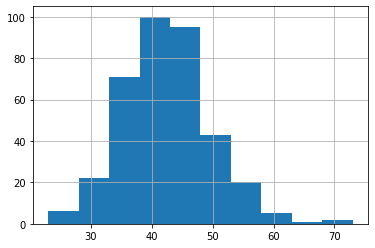

In [155]:
adf_test("daily-total-female-births-in-cal.csv");

# Tuning HyperParameters for Time Series

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [2]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,5)


In [ ]:
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             order = (p,d,q)
#             train, test = f_birth[0:300], f_birth[300:365]
#             predictions = list()
#             for i in range(len(test)):
#                 try:
#                     model = ARIMA(train, order)
#                     model_fit = model.fit(disp =0)
#                     pred_y = model_fit.forecast()[0]
#                     predictions.append(pred_y)
#                     error = mean_squared_error(test, predictions)
#                     print('ARIMA%s MSE = %.2f' % (order, error))
#                 except: 
#                     continue

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

ARIMA(0, 0, 1) MSE = 56.52


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

ARIMA(0, 0, 2) MSE = 63.85


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

ARIMA(0, 0, 3) MSE = 62.33


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

ARIMA(0, 0, 4) MSE = 64.77


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

ARIMA(0, 1, 1) MSE = 40.91


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2) MSE = 39.78


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 3) MSE = 39.82


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 4) MSE = 40.19


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1) MSE = 290.02


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2) MSE = 41.86


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\L

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 3) MSE = 40.63


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\LE

# ARIMAX and SARIMAX 

In [2]:
# ARIMA - forecasting based on the presence of trend
# SARIMA - Along with trend there is also presence of seasonality
# Exogenous variable - X

In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline
    

In [7]:
shampoo = pd.read_csv("shampoo.csv", index_col = [0])

In [8]:
shampoo.head()

,Sales,Inflation
Month,,
01-Jan,266.0,1
01-Feb,145.9,1
01-Mar,183.1,0
01-Apr,119.3,0
01-May,180.3,3


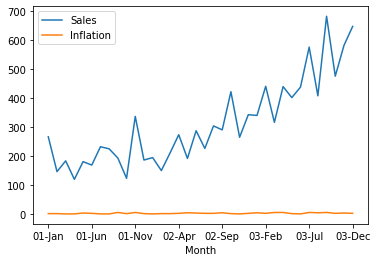

In [9]:
shampoo.plot()

In [13]:
sarimax_model = SARIMAX(shampoo["Sales"], order = (1,1,1), seasonal_order = (1,1,1,4), exog =shampoo["Inflation"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
res = sarimax_model.fit(disp = False)

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -178.630
Date:                           Thu, 09 Apr 2020   AIC                            369.259
Time:                                   15:45:32   BIC                            377.863
Sample:                                        0   HQIC                           372.064
                                            - 36                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      5.7332      8.089      0.709      0.478     -10.121      21.588
ar.L1         -0.5542      0.305     -1.818      0.069      -1.152       0.043
ma.L1         -0.5832      0.390     -1.497      0.134      -1.347       0.181
ar.S.L4        0.4648      0.510      0.912      0.362      -0.534       1.464
ma.S.L4       -0.9884     10.388     -0.095      0.924     -21.348      19.371
sigma2      4833.5408   4.79e+04      0.101      0.920    -8.9e+04    9.87e+04
===================================================================================
Ljung-Box (Q):                       33.36   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.31   Prob(JB):                         0.61
Heteroskedasticity (H):               1.63   Skew:                             0.31
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""